In [16]:
import pandas as pd
import numpy as np

In [19]:
# data = pd.read_csv("Processed.csv")
data = pd.read_csv("balanced.csv")

# df = data.head(700)
df = data.sample(700)
df = df[['Content','SourceatBot7']]
df = df[df['SourceatBot7'].str.contains("Human") | df['SourceatBot7'].str.contains("Bot")]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


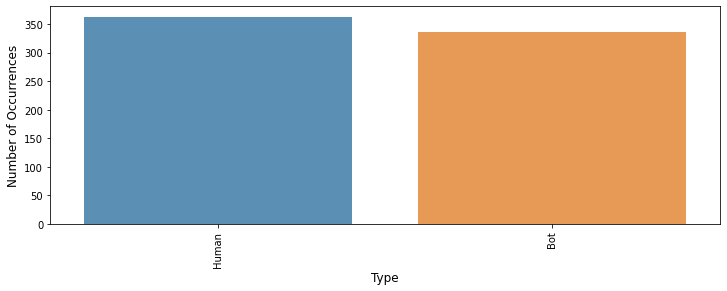

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
cnt_pro = df['SourceatBot7'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Type', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [21]:
# !pip install torch
!pip install transformers
import torch
import transformers as ppb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
model_class, tokenizer_class, pretrained_weights = (ppb.DistilBertModel, ppb.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [24]:
df["Content"]

47912    final ’ cool say public want tom hank ’ blood ...
14939    rt realdonaldtrump great credit given coronavi...
31130    rt o_rip un admit coronavirus pandem could spa...
5481     rt jsolomonreport cuomo administr scandal n.y....
22093    rt prisonplanet complet fail stop spread covid...
                               ...                        
18863    doj beg new ‘ emerg power ’ extend capabl coro...
6383     mitch mcconnel aid abet spread coronavirus htt...
27989    spot want outdoor garden check avalowgarden ea...
15000    rt jsolomonreport cdc director hot seat predic...
50086    local govern take fiscal pound coronarecess ex...
Name: Content, Length: 700, dtype: object

In [25]:
tokenized = df["Content"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True)))

In [26]:
max_len = max([len(x) for x in tokenized])
padded = [np.pad(x, (0, max_len - len(x)), 'constant') for x in tokenized]

In [27]:
input_ids = torch.tensor(np.array(padded))
with torch.no_grad():
    last_hidden_states = model(input_ids)
features = last_hidden_states[0][:,0,:].numpy()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
labels = df['SourceatBot7']
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state = 1)

In [29]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
print('LGR Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('LGR Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('LGR Testing CM: {}\n'.format(confusion_matrix(y_test, y_pred)))

LGR Testing accuracy 0.45
LGR Testing F1 score: 0.45093177267826884
LGR Testing CM: [[26 37]
 [40 37]]



In [31]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = BernoulliNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [32]:
print('NB Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('NB Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('NB Testing CM: {}\n'.format(confusion_matrix(y_test, y_pred)))

NB Testing accuracy 0.5071428571428571
NB Testing F1 score: 0.5019160817664841
NB Testing CM: [[40 23]
 [46 31]]



In [33]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [34]:
print('SVM Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('SVM Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))
print('SVM Testing CM: {}\n'.format(confusion_matrix(y_test, y_pred)))

SVM Testing accuracy 0.45714285714285713
SVM Testing F1 score: 0.4571428571428571
SVM Testing CM: [[25 38]
 [38 39]]



In [35]:
X_train

array([[ 1.82737485e-01, -8.37888941e-02,  2.23877415e-01, ...,
         9.42795724e-02,  7.66342521e-01, -1.13161005e-01],
       [-2.64617279e-02, -1.72474235e-01,  1.37967929e-01, ...,
         6.30335286e-02,  6.34905696e-01,  7.09572583e-02],
       [ 1.72846660e-01, -1.50714889e-01,  1.56615153e-01, ...,
         1.37946755e-01,  7.22532153e-01, -6.90275431e-02],
       ...,
       [ 1.32779390e-01, -8.30365568e-02,  2.17790097e-01, ...,
         6.66714162e-02,  8.58932376e-01, -1.19437918e-01],
       [ 6.33228049e-02, -1.89482927e-01,  1.59349978e-01, ...,
         8.35652575e-02,  7.19317734e-01,  3.61439597e-04],
       [ 1.02454491e-01, -1.11466311e-01,  3.10554534e-01, ...,
         8.39652270e-02,  7.37451434e-01, -1.10024795e-01]], dtype=float32)